# Residue Constants

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os

from Bio.PDB.MMCIF2Dict import MMCIF2Dict
from collections import defaultdict
from poc.analysis.af_residue_constants import rigid_group_atom_positions

## Sample Files

In [3]:
data_dir = 'cif_with_hydrogen'
samples = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir)]
samples = [sample for sample in samples if sample.endswith('.cif')]
samples

['cif_with_hydrogen/1ac7.cif_h.cif',
 'cif_with_hydrogen/1a2g.cif_h.cif',
 'cif_with_hydrogen/1aep.cif_h.cif',
 'cif_with_hydrogen/1aiy.cif_h.cif',
 'cif_with_hydrogen/168l.cif_h.cif',
 'cif_with_hydrogen/1a1w.cif_h.cif',
 'cif_with_hydrogen/1a70.cif_h.cif',
 'cif_with_hydrogen/1ah4.cif_h.cif',
 'cif_with_hydrogen/1a5m.cif_h.cif',
 'cif_with_hydrogen/1abz.cif_h.cif',
 'cif_with_hydrogen/1ans.cif_h.cif',
 'cif_with_hydrogen/1amc.cif_h.cif',
 'cif_with_hydrogen/1aaj.cif_h.cif',
 'cif_with_hydrogen/185d.cif_h.cif',
 'cif_with_hydrogen/1alg.cif_h.cif',
 'cif_with_hydrogen/1a7y.cif_h.cif',
 'cif_with_hydrogen/1a4i.cif_h.cif',
 'cif_with_hydrogen/1ae9.cif_h.cif',
 'cif_with_hydrogen/1ai0.cif_h.cif',
 'cif_with_hydrogen/1a64.cif_h.cif',
 'cif_with_hydrogen/1agd.cif_h.cif',
 'cif_with_hydrogen/1akm.cif_h.cif',
 'cif_with_hydrogen/1a0s.cif_h.cif',
 'cif_with_hydrogen/197l.cif_h.cif',
 'cif_with_hydrogen/118d.cif_h.cif',
 'cif_with_hydrogen/1a3c.cif_h.cif',
 'cif_with_hydrogen/1ab3.cif_h.cif',
 

## Process files to new format

In [52]:
amino_acids = []
for j, sample in enumerate(samples):
    print(j, end=' ')
    parsed_cif = MMCIF2Dict(sample)
    chain_before = None
    seq_id_before = None
    current_aa = []
    current_chain = defaultdict(list)
    for i in range(len(parsed_cif['_atom_site.group_PDB'])):
        if parsed_cif['_atom_site.group_PDB'][i] != 'ATOM': continue
        if parsed_cif['_atom_site.label_comp_id'][i] not in ['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'GLY', 'HIS', 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']: continue
        seq_id = parsed_cif['_atom_site.label_seq_id'][i]
        chain = parsed_cif['_atom_site.auth_asym_id'][i]
        if chain != chain_before and chain_before is not None:
            if current_chain.values():
                amino_acids.append(*current_chain.values())
            current_chain = defaultdict(list)
        if seq_id != seq_id_before and seq_id_before is not None:
            current_chain[chain].append(current_aa)
            current_aa = []
        aa = parsed_cif['_atom_site.label_comp_id'][i]
        atom_id = parsed_cif['_atom_site.label_atom_id'][i]
        x = float(parsed_cif['_atom_site.Cartn_x'][i])
        y = float(parsed_cif['_atom_site.Cartn_y'][i])
        z = float(parsed_cif['_atom_site.Cartn_z'][i])
        if len(current_aa) == 0:
            current_aa.append(parsed_cif['_atom_site.label_comp_id'][i])
        current_aa.append((atom_id, x, y, z))
        chain_before = chain
        seq_id_before = seq_id
    if current_chain.values():
        amino_acids.append(*current_chain.values())

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [53]:
# utility function
def bplot_data_with_stats(data, title: str, label: str, fn: str):
    plt.boxplot(data, vert=False)

    handles = [
        plt.Line2D([0], [0], color='none', label=f"Mean: {np.mean(data):.10f}"),
        plt.Line2D([0], [0], color='none', label=f"Median: {np.median(data):.10f}"),
    ]
    plt.legend(handles=handles, loc='upper right')

    plt.title(title)
    plt.xlabel(label)
    plt.savefig(f"plt/{fn}.png", dpi=600)
    plt.show()

## Data stats

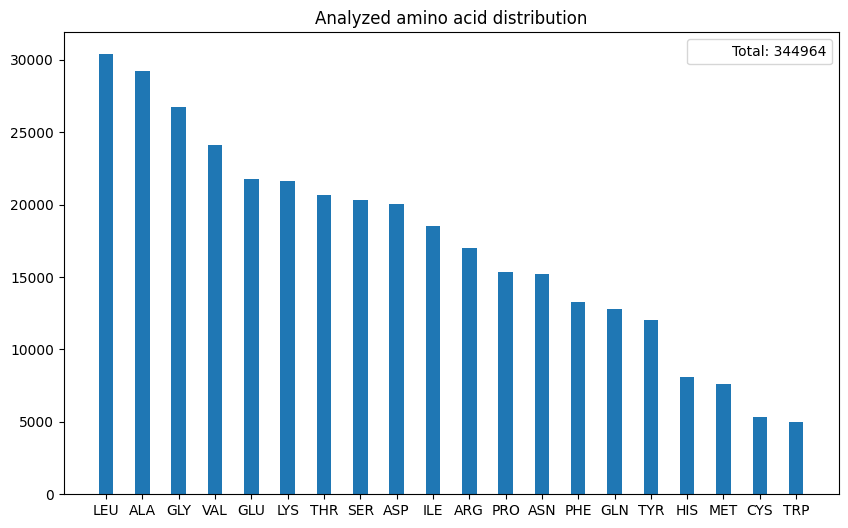

Total analyzed amino acids: 344964


In [54]:
disassembled_acids = defaultdict(int)
for chain in amino_acids:
    for aa in chain:
        disassembled_acids[aa[0]] += 1
sorted_items = sorted(disassembled_acids.items(), key=lambda x: x[1], reverse=True)
labels, counts = zip(*sorted_items)
total = sum(disassembled_acids.values())
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, width=0.4)
handles = [
    plt.Line2D([0], [0], color='none', label=f"Total: {total}"),
]
plt.legend(handles=handles, loc='upper right')
plt.title("Analyzed amino acid distribution")
plt.savefig(f"plt/aas_analyzed.png", dpi=600)
plt.show()

print('Total analyzed amino acids:', total)


### Alpha Folds Measurements

In [55]:
af_rigid_atom_positions = defaultdict(lambda: defaultdict(float))
for aa, atoms in rigid_group_atom_positions.items():
    for atom in atoms:
        af_rigid_atom_positions[aa][atom[0]] = math.sqrt(atom[2][0]**2 + atom[2][1]**2 + atom[2][2]**2)

## Params

In [56]:
percentile_cut = 0.05

### Ca - Ca distance

In [57]:
ca_ca_distances = []
# af_ca_ca = 3.80209737096
for chain in amino_acids:
    ca_before = None
    for aa in chain:
        for atom in aa[1:]:
            if atom[0] != 'CA': continue
            if ca_before is None:
                ca_before = atom
                continue
            ca_ca_distances.append(
                math.sqrt(
                    (ca_before[1]-atom[1])**2 + (ca_before[2]-atom[2])**2 + (ca_before[3]-atom[3])**2
                )
            )
            ca_before = atom

perc = int(len(ca_ca_distances) * percentile_cut)
ca_ca_distances = np.array(sorted(ca_ca_distances)[perc:-perc])
# ca_ca_distances = np.array(ca_ca_distances)

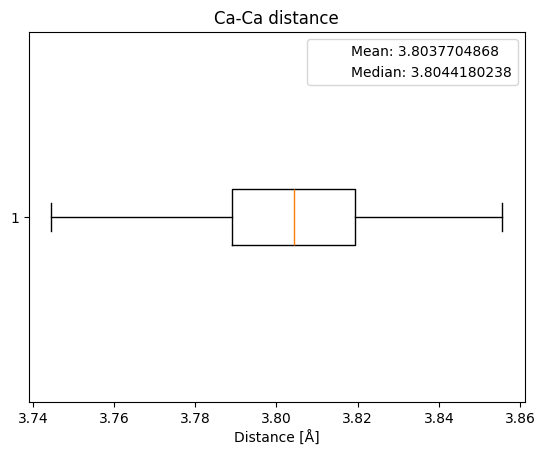

In [58]:
bplot_data_with_stats(ca_ca_distances, 'Ca-Ca distance', 'Distance [Å]', 'distance_ca_ca')

### C - O distance

In [59]:
c_o_distances = []
for chain in amino_acids:
    for aa in chain:
        c = next(atom for atom in aa[1:] if atom[0] == 'C')
        o = next(atom for atom in aa[1:] if atom[0] == 'O')

        c_o_distances.append(
            math.sqrt(
                (c[1]-o[1])**2 + (c[2]-o[2])**2 + (c[3]-o[3])**2
            )
        )

perc = int(len(c_o_distances) * percentile_cut)
c_o_distances = np.array(sorted(c_o_distances)[perc:-perc])

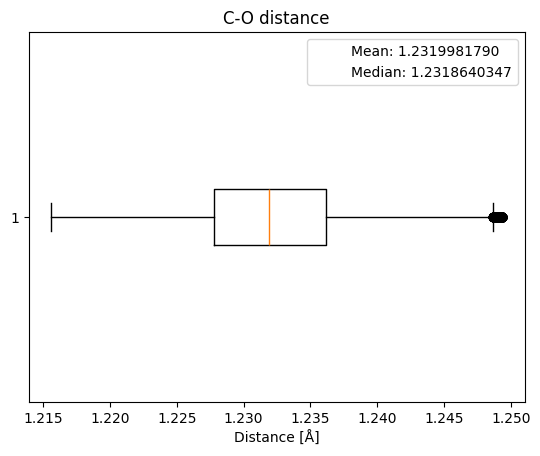

In [60]:
bplot_data_with_stats(c_o_distances, 'C-O distance', 'Distance [Å]', 'distance_c_o')

### C - N distance

In [61]:
c_n_distances = []
for chain in amino_acids:
    c_before = None
    for aa in chain:
        for atom in aa[1:]:
            if atom[0] not in ['C', 'N']: continue
            if c_before is None and atom[0] == 'C':
                c_before = atom
                continue
            if c_before is not None and atom[0] == 'N':
                c_n_distances.append(
                    math.sqrt(
                         (c_before[1]-atom[1])**2 + (c_before[2]-atom[2])**2 + (c_before[3]-atom[3])**2
                    )
                )
                c_before = None

perc = int(len(c_n_distances) * percentile_cut)
c_n_distances = np.array(sorted(c_n_distances)[perc:-perc])

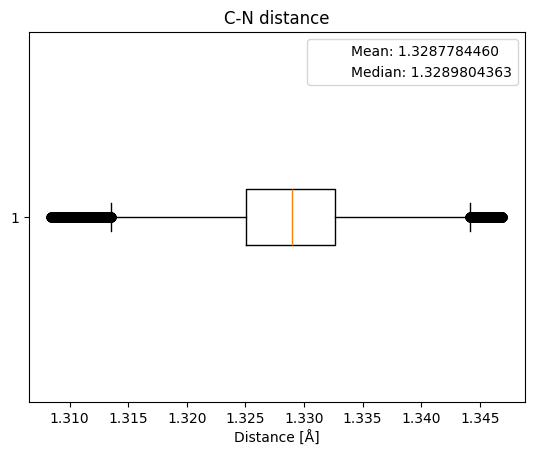

In [62]:
bplot_data_with_stats(c_n_distances, 'C-N distance', 'Distance [Å]', 'distance_c_n')

### N - H distance

In [63]:
n_h_distances = []
for chain in amino_acids:
    c_before = None
    for aa in chain:
        for atom in aa[1:]:
            if atom[0] not in ['N', 'H']: continue
            if c_before is None and atom[0] == 'N':
                c_before = atom
                continue
            if c_before is not None and atom[0] == 'H':
                n_h_distances.append(
                    math.sqrt(
                         (c_before[1]-atom[1])**2 + (c_before[2]-atom[2])**2 + (c_before[3]-atom[3])**2
                    )
                )
                c_before = None

perc = int(len(n_h_distances) * percentile_cut)
n_h_distances = np.array(sorted(n_h_distances)[perc:-perc])

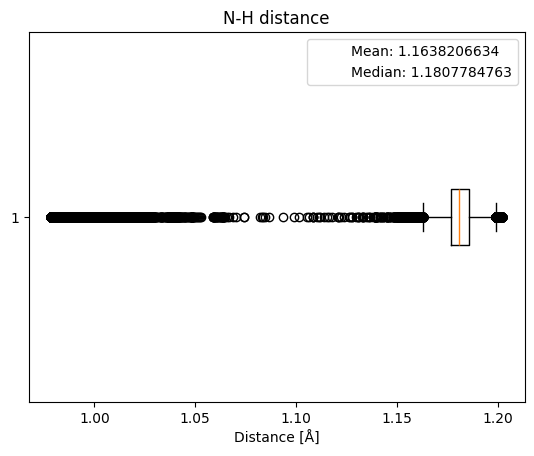

In [64]:
bplot_data_with_stats(n_h_distances, 'N-H distance', 'Distance [Å]', 'distance_n_h')

## Angles

In [65]:
def unit_vector(vector):
    return vector / np.linalg.norm(vector)

def calculate_angle(p1, p2, p3):
    # print('p1', p1)
    # print('p2', p2)
    # print('p3', p3)
    v1 = p1 - p2
    v2 = p3 - p2
    v1_u = v1 / np.linalg.norm(v1)
    v2_u = v2 / np.linalg.norm(v2)
    # print('v1', v1, v1_u)
    # print('v2', v2, v2_u)
    return np.degrees(np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)))

The first two angles are completely within one amino acid, so the data is processed accordingly.

In [66]:
aas = defaultdict(list)
for chain in amino_acids:
    for aa in chain:
        aas[aa[0]].append(aa[1:])


In [67]:
def get_data_for_angle(a1: str, a2: str, a3: str) -> np.array:
    angles = []
    for key, values in aas.items():
        for aa in values:
            n = next(atom for atom in aa if atom[0] == a1)
            ca = next(atom for atom in aa if atom[0] == a2)
            c = next(atom for atom in aa if atom[0] == a3)
            angle = calculate_angle(np.array(n[1:]), np.array(ca[1:]), np.array(c[1:]))
            angles.append(angle)

    perc = int(len(angles) * percentile_cut)
    return np.array(sorted(angles)[perc:-perc])


### N - Ca - C


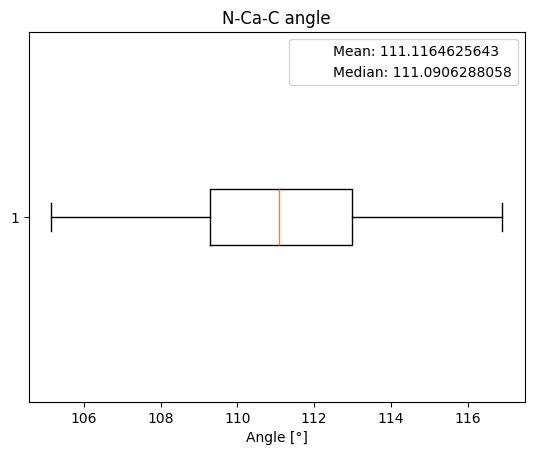

In [68]:
bplot_data_with_stats(get_data_for_angle('N', 'CA', 'C'), 'N-Ca-C angle', 'Angle [°]', 'angle_n_ca_c')

### Ca - C - O

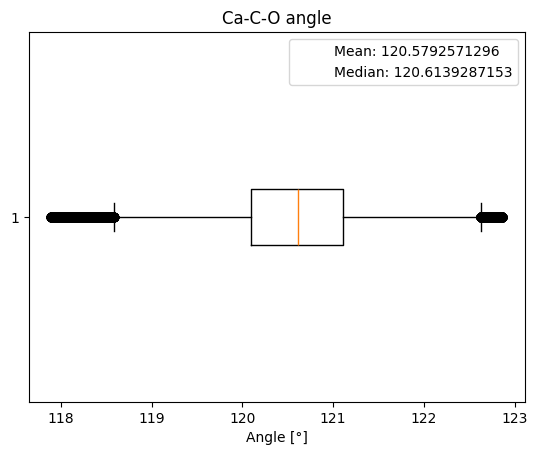

In [69]:
bplot_data_with_stats(get_data_for_angle('CA', 'C', 'O'), 'Ca-C-O angle', 'Angle [°]', 'angle_ca_c_o')

### Ca - C - N

In [70]:
ca_c_n_angles = []
for chain in amino_acids:
    for i in range(len(chain) - 1):
        res1 = chain[i]
        res2 = chain[i + 1]
        ca = next(atom for atom in res1[1:] if atom[0] == 'CA')
        c  = next(atom for atom in res1[1:] if atom[0] == 'C')
        n  = next(atom for atom in res2[1:] if atom[0] == 'N')
        ca_c_n_angles.append(calculate_angle(np.array(ca[1:]), np.array(c[1:]), np.array(n[1:])))
perc = int(len(ca_c_n_angles) * percentile_cut)
ca_c_n_angles = np.array(sorted(ca_c_n_angles)[perc:-perc])

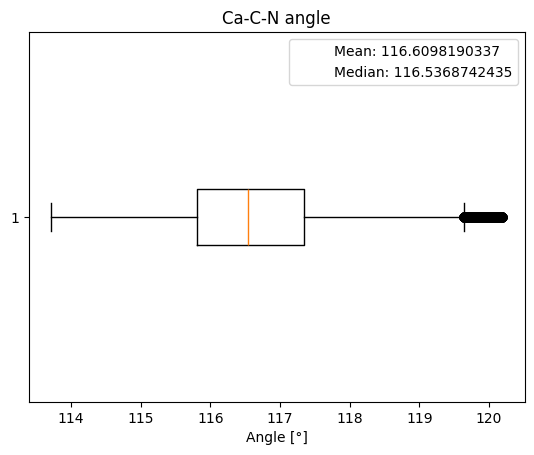

In [71]:
bplot_data_with_stats(ca_c_n_angles, 'Ca-C-N angle', 'Angle [°]', 'angle_ca_c_n')

### C - N - CA

In [72]:
c_n_ca_angles = []
for chain in amino_acids:
    for i in range(len(chain) - 1):
        res1 = chain[i]
        res2 = chain[i + 1]
        ca = next(atom for atom in res1[1:] if atom[0] == 'C')
        c  = next(atom for atom in res2[1:] if atom[0] == 'N')
        n  = next(atom for atom in res2[1:] if atom[0] == 'CA')
        c_n_ca_angles.append(calculate_angle(np.array(ca[1:]), np.array(c[1:]), np.array(n[1:])))
perc = int(len(c_n_ca_angles) * percentile_cut)
c_n_ca_angles = np.array(sorted(c_n_ca_angles)[perc:-perc])

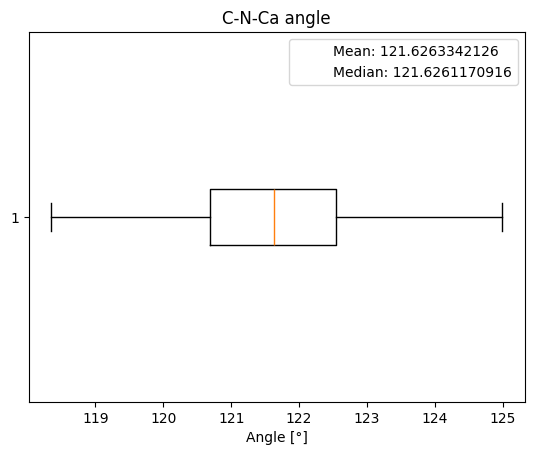

In [73]:
bplot_data_with_stats(c_n_ca_angles, 'C-N-Ca angle', 'Angle [°]', 'angle_c_n_ca')

### C - N - H

In [74]:
c_n_h_angles = []
for chain in amino_acids:
    for i in range(len(chain) - 1):
        res1 = chain[i]
        res2 = chain[i + 1]
        try:
            ca = next(atom for atom in res1[1:] if atom[0] == 'C')
            c  = next(atom for atom in res2[1:] if atom[0] == 'N')
            n  = next(atom for atom in res2[1:] if atom[0] == 'H')
        except StopIteration:
            continue
        c_n_h_angles.append(calculate_angle(np.array(ca[1:]), np.array(c[1:]), np.array(n[1:])))
perc = int(len(c_n_h_angles) * percentile_cut)
c_n_h_angles = np.array(sorted(c_n_h_angles)[perc:-perc])

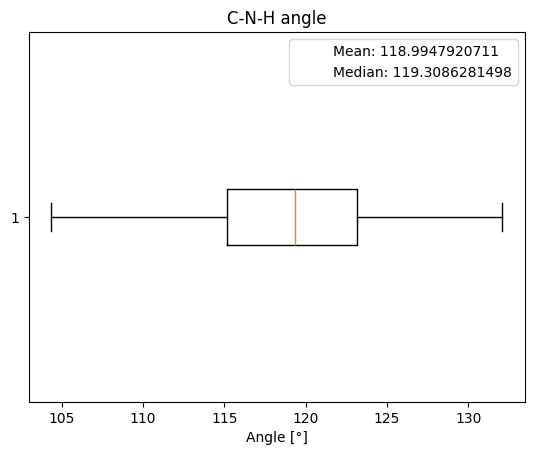

In [75]:
bplot_data_with_stats(c_n_h_angles, 'C-N-H angle', 'Angle [°]', 'angle_c_n_h')